In [1]:
import pandas as pd
import mlflow
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
client = mlflow.tracking.MlflowClient(tracking_uri="http://localhost:5000")

In [3]:
exp_id = client.get_experiment_by_name("Subnetwork").experiment_id
runs = client.search_runs(experiment_ids=exp_id)
runs_df = pd.DataFrame([{ **dict(run.info), **run.data.params, **run.data.metrics} for run in runs])

In [4]:
runs_df["finished"] = "yes"
runs_df.loc[runs_df["best_val_loss"].isna(), "finished"] = "no"


In [6]:
runs_df[runs_df["finished"]=="no"]

,artifact_uri,end_time,experiment_id,lifecycle_stage,run_id,run_name,run_uuid,start_time,status,user_id,...,test_mse_p53,test_mse_p90RSK,test_mse_RB,test_mse_SMAD23,test_mse_SRC,test_mse_EGFR,test_mse,train_loss,best_val_loss,finished
5,s3://mlflow/58/2c72dd61ebde4cbca1381e3a0c0ad37...,None,58,active,2c72dd61ebde4cbca1381e3a0c0ad376,,2c72dd61ebde4cbca1381e3a0c0ad376,1690112374509,RUNNING,adr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038940,NaN,no
6,s3://mlflow/58/11bf93e058724f269963c1d0de74283...,None,58,active,11bf93e058724f269963c1d0de742838,,11bf93e058724f269963c1d0de742838,1690111149591,RUNNING,adr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032400,NaN,no
7,s3://mlflow/58/81ac13529a0d4010bededace0867e8c...,None,58,active,81ac13529a0d4010bededace0867e8c0,,81ac13529a0d4010bededace0867e8c0,1690110647427,RUNNING,adr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038425,NaN,no
8,s3://mlflow/58/2b43d079459748be95351a3664e91d4...,None,58,active,2b43d079459748be95351a3664e91d45,,2b43d079459748be95351a3664e91d45,1690110643989,RUNNING,adr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041690,NaN,no
9,s3://mlflow/58/e081227b8fcb467aa26c078d5a49d59...,None,58,active,e081227b8fcb467aa26c078d5a49d596,,e081227b8fcb467aa26c078d5a49d596,1690110611531,RUNNING,adr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034566,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,s3://mlflow/58/3a615c2384cb48ce94f6f7d2af5d2ee...,None,58,active,3a615c2384cb48ce94f6f7d2af5d2ee5,,3a615c2384cb48ce94f6f7d2af5d2ee5,1689357363272,RUNNING,adr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035102,NaN,no
300,s3://mlflow/58/f91c29afb3a64d71b8ff4460e8ab1ad...,None,58,active,f91c29afb3a64d71b8ff4460e8ab1ad6,,f91c29afb3a64d71b8ff4460e8ab1ad6,1689356775922,RUNNING,adr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029345,NaN,no
301,s3://mlflow/58/d5872090db654213a4879d08a2b5e4e...,None,58,active,d5872090db654213a4879d08a2b5e4e7,,d5872090db654213a4879d08a2b5e4e7,1689356586852,RUNNING,adr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034600,NaN,no
302,s3://mlflow/58/d9dd9bf54d644e0aa7257b4057801bf...,None,58,active,d9dd9bf54d644e0aa7257b4057801bf6,,d9dd9bf54d644e0aa7257b4057801bf6,1689356586852,RUNNING,adr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030945,NaN,no


In [7]:
runs_df["start_time"] = pd.to_datetime(runs_df["start_time"])
runs_df["n_epochs"] = runs_df["n_epochs"].astype(int)
runs_df["learning_rate"] = runs_df["learning_rate"].astype(float)
runs_df["batch_size"] = runs_df["batch_size"].astype(float)

<AxesSubplot: xlabel='finished', ylabel='n_epochs'>

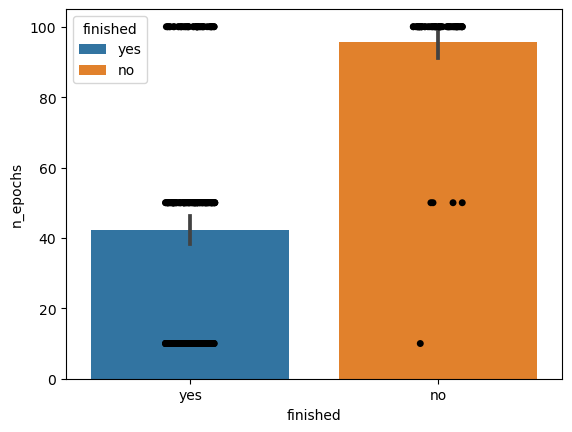

In [9]:
sns.barplot(data=runs_df, y="n_epochs", x="finished", hue="finished", dodge=False)
sns.stripplot(data=runs_df, y="n_epochs", x="finished", hue="finished", dodge=False, 
              palette={"yes": "black", "no": "black"}, legend=False)

<AxesSubplot: xlabel='finished', ylabel='learning_rate'>

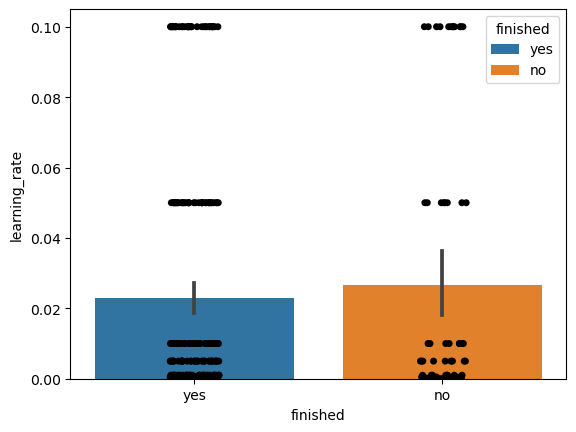

In [10]:
sns.barplot(data=runs_df, y="learning_rate", x="finished", hue="finished", dodge=False)
sns.stripplot(data=runs_df, y="learning_rate", x="finished", hue="finished", dodge=False, 
              palette={"yes": "black", "no": "black"}, legend=False)

<AxesSubplot: xlabel='finished', ylabel='batch_size'>

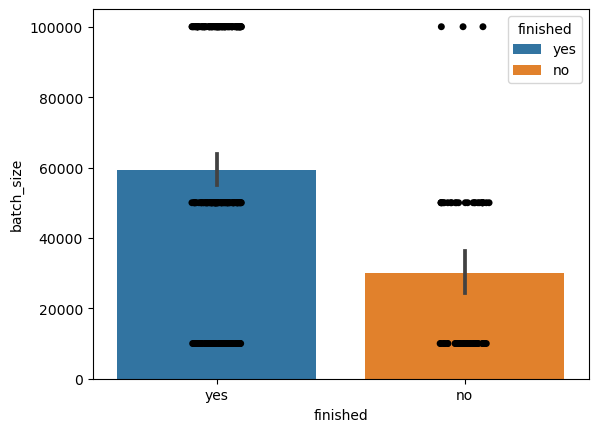

In [11]:
sns.barplot(data=runs_df, y="batch_size", x="finished", hue="finished", dodge=False)
sns.stripplot(data=runs_df, y="batch_size", x="finished", hue="finished", dodge=False, 
              palette={"yes": "black", "no": "black"}, legend=False)